# データの準備

In [1]:
import pandas as pd

predict_data = pd.read_csv("kadai2.csv")
predict_data

,Unnamed: 0,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,0,3.0,1.0,46,0.0,0,0,1,0,1
1,1,6.0,1.0,21,0.0,0,0,1,0,1
2,2,3.0,1.0,38,0.0,0,0,0,0,1
3,3,10.0,1.0,8,0.0,0,0,0,1,1
4,4,3.0,1.0,32,0.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3700,3941,2.0,0.0,11,1.0,0,0,0,0,1
3701,3942,6.0,0.0,1,1.0,0,1,0,0,0
3702,3943,3.0,0.0,1,1.0,0,1,0,1,1
3703,3944,3.0,1.0,11,1.0,0,0,0,1,1


In [2]:
#　不要な「Unnamed: 0」を削除

del predict_data["Unnamed: 0"]
predict_data

,count_1,routine_flg,period,is_deleted,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,3.0,1.0,46,0.0,0,0,1,0,1
1,6.0,1.0,21,0.0,0,0,1,0,1
2,3.0,1.0,38,0.0,0,0,0,0,1
3,10.0,1.0,8,0.0,0,0,0,1,1
4,3.0,1.0,32,0.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
3700,2.0,0.0,11,1.0,0,0,0,0,1
3701,6.0,0.0,1,1.0,0,1,0,0,0
3702,3.0,0.0,1,1.0,0,1,0,1,1
3703,3.0,1.0,11,1.0,0,0,0,1,1


# ランダムフォレスト

In [3]:
# ライブラリのインポート
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection

#　退会と継続のデータ件数を揃える（比率50：50）
exit = predict_data.loc[predict_data["is_deleted"]==1]
conti = predict_data.loc[predict_data["is_deleted"]==0].sample(len(exit))

#　is_deleted列の目的変数yとし、is_deleted列を削除したデータを説明変数のXとする
X = pd.concat([exit, conti], ignore_index=True)
y = X["is_deleted"]
del X["is_deleted"]


#　データの分割
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

#　ランダムフォレスト
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=100, 
                                random_state=1,
                                n_jobs=2)

#　トレーニング
forest.fit(X_train, y_train)

#　予測
y_test_pred = forest.predict(X_test)

print(y_test_pred)

[1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1.

In [4]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.982
Accuracy on test set: 0.907


In [5]:
importance = pd.DataFrame({"feature_names":X.columns, "coefficient":forest.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.306234
1,routine_flg,0.176418
2,period,0.417281
3,campaign_name_入会費半額,0.034052
4,campaign_name_入会費無料,0.032025
5,class_name_オールタイム,0.011039
6,class_name_デイタイム,0.008730
7,gender_F,0.014222


C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: Runtim

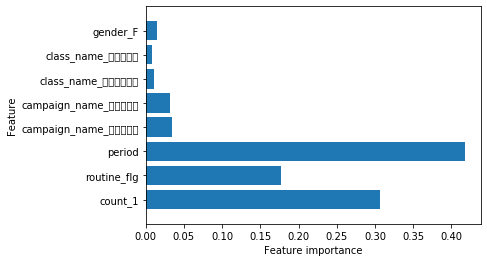

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.keys())
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)